<font size=5 > <p style="color:purple"> Welche Faktoren beeinflussen den Preis von Krankenversicherungen?

<font size='2'>Viele Faktoren, die sich auf die Höhe Ihrer Krankenversicherungsbeiträge auswirken, liegen nicht in Ihrem Einflussbereich. Trotzdem ist es gut, wenn Sie wissen, welche das sind. Hier sind einige Faktoren, die sich auf die Höhe der Krankenversicherungsprämien auswirken

* **Alter:** Alter des Hauptbegünstigten

* **Geschlecht:** Geschlecht des Versicherungsvertragsnehmers, weiblich, männlich

* **bmi:** Body-Mass-Index, bietet ein Verständnis des Körpers, Gewichte, die relativ hoch oder niedrig im Verhältnis zur Höhe, objektive Index des Körpergewichts (kg / m ^ 2) mit dem Verhältnis von Höhe zu Gewicht, idealerweise 18,5 bis 24,9 sind

* **Kinder:** Anzahl der krankenversicherten Kinder / Anzahl der unterhaltsberechtigten Personen

* **Raucher:** Rauchen

* **Region:** Wohngebiet des Begünstigten in den USA, Nordosten, Südosten, Südwesten, Nordwesten



<font size=5><p style="color:purple"> EDA and Visualizations 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<font size='2' font>Analysieren wir nun die Versicherungskosten nach Alter, BMI und Kindern nach dem Faktor Rauchen 

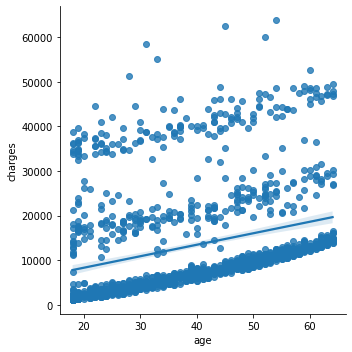

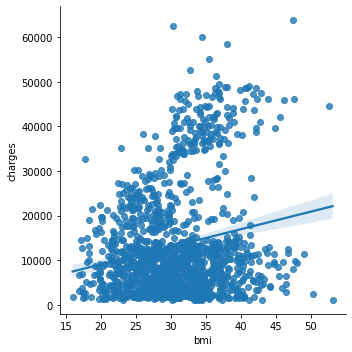

In [8]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, palette='Set2')

In [9]:
##Umwandlung von Objektbeschriftungen in kategorische
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes
#df.head()

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [10]:
##Umwandlung von Kategoriebezeichnungen in numerische Werte mit LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


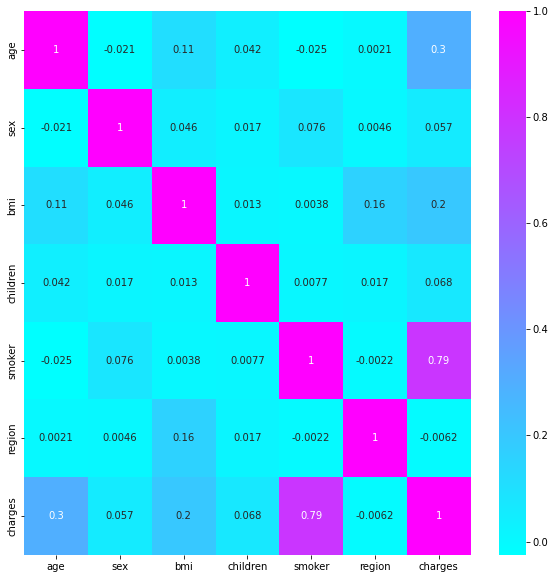

In [11]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

<font size='2' font>Keine Korrelation, außer mit dem Rauchen 

<font size=5><p style="color:purple"> Lineare Regression

<font size=2><p style="color:blue"> Funktionen für Evaluation der Ergebnisse

In [12]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score


def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def regression_analysis(X, y, model):
    
    is_statsmodels = False
    is_sklearn = False
    
    # check for accepted linear models
    if type(model) in [sklearn.linear_model._base.LinearRegression,
                       sklearn.linear_model._ridge.Ridge,
                       sklearn.linear_model._ridge.RidgeCV,
                       sklearn.linear_model._coordinate_descent.Lasso,
                       sklearn.linear_model._coordinate_descent.LassoCV,
                       sklearn.linear_model._coordinate_descent.ElasticNet,
                       sklearn.linear_model._coordinate_descent.ElasticNetCV,
                      ]:
        is_sklearn = True
    elif type(model) in [statsmodels.regression.linear_model.OLS, 
                         statsmodels.base.elastic_net.RegularizedResults,
                        ]:
        is_statsmodels = True
    else:
        print("Only linear models are supported!")
        return None
    
    
    
    has_intercept = False
    
    if is_statsmodels and all(np.array(X)[:,0]==1):
        # statsmodels add_constant has been used already
        has_intercept = True  
    elif is_sklearn and model.intercept_:
        has_intercept = True
        

    
    if is_statsmodels:
        # add_constant has been used already
        x = X
        model_params = model.params
    else: # sklearn model
        if has_intercept:
            x = sm.add_constant(X)
            model_params = np.hstack([np.array([model.intercept_]), model.coef_])
        else:
            x = X
            model_params = model.coef_
        
    #y = np.array(y).ravel()
    
    # define the OLS model
    olsModel = sm.OLS(y, x)
    
    pinv_wexog,_ = pinv_extended(x)
    normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))
    
    
    return sm.regression.linear_model.OLSResults(olsModel, model_params, normalized_cov_params)
    

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     496.0
Date:                Fri, 24 Feb 2023   Prob (F-statistic):          5.53e-304
Time:                        10:53:59   Log-Likelihood:                -10852.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1063   BIC:                         2.175e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.166e+04   1079.677    -10.801      0.0

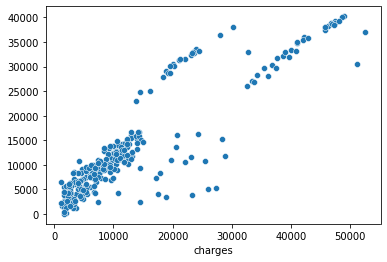

In [13]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy import stats

x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)


############
####Linear Regression with p-values
import statsmodels.api as sm
from scipy import stats
x_train=sm.add_constant(x_train)
est = sm.OLS(y_train, x_train)
est2 = est.fit()
print(est2.summary())



##Predicting the charges
x_test = sm.add_constant(x_test)
test_pred = est2.predict(x_test)
train_pred = est2.predict(x_train)
##Comparing the actual output values with the predicted values
sns.scatterplot(y_test,test_pred)

df = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})
df.head()


print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


<font size=5><p style="color:purple"> Lasso Regression

Best alpha : 1.0
Test set evaluation:
_____________________________________
MAE: 3941.615467047815
MSE: 32174390.843070243
RMSE: 5672.2474243522065
R2 Square 0.7978106047813933
__________________________________
Train set evaluation:
_____________________________________
MAE: 4239.292302064685
MSE: 37828896.46967463
RMSE: 6150.52001619982
R2 Square 0.7361378794058284
__________________________________
const           0.000000
age           254.960856
sex             0.000000
bmi           320.606277
children      429.966743
smoker      23581.414436
region          0.000000
dtype: float64


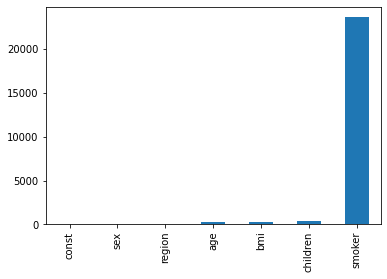

In [14]:
from sklearn.linear_model import Lasso, LassoCV

lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(x_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)


model = Lasso(alpha=alpha, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(x_train, y_train)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)



print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


pd.Series(model.coef_, x_train.columns).sort_values(ascending = True).plot(kind = "bar")
coefs_lasso = pd.Series(model.coef_, index = x_train.columns)
print(coefs_lasso.head(10))


<font size=5><p style="color:purple"> Ridge Regression

Best alpha : 0.1
Test set evaluation:
_____________________________________
MAE: 3931.59860370103
MSE: 31851414.281051546
RMSE: 5643.705722400092
R2 Square 0.7998402449403277
__________________________________
Train set evaluation:
_____________________________________
MAE: 4236.269908876743
MSE: 37729610.47481883
RMSE: 6142.443363582511
R2 Square 0.736830413833021
__________________________________
const           0.000000
age           253.972187
sex           -23.759767
bmi           328.389979
children      443.831454
smoker      23555.265627
region       -288.612763
dtype: float64


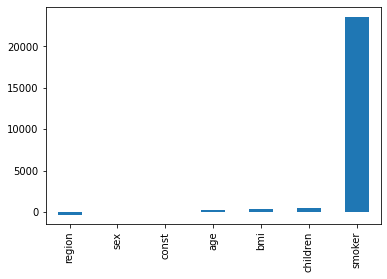

In [15]:
from sklearn.linear_model import Ridge, RidgeCV
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(x_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

model = Ridge(alpha=alpha, solver='cholesky', tol=0.0001, random_state=42)
model.fit(x_train, y_train)
pred = model.predict(x_test)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

# Plot important coefficients
pd.Series(model.coef_, x_train.columns).sort_values(ascending = True).plot(kind = "bar")
coefs_ridge = pd.Series(model.coef_, index = x_train.columns)
print(coefs_ridge.head(10))


<font size=5><p style="color:purple"> Deep Learning

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(0.01), loss='mse')

r = model.fit(x_train, y_train,
              validation_data=(x_test,y_test),
              batch_size=1,
              epochs=40)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)






Epoch 1/40
1070/1070 [==============================] - 2s 2ms/step - loss: 142487920.0000 - val_loss: 132672280.0000
Epoch 2/40
1070/1070 [==============================] - 1s 1ms/step - loss: 124178520.0000 - val_loss: 129013376.0000
Epoch 3/40
1070/1070 [==============================] - 1s 1ms/step - loss: 118644048.0000 - val_loss: 119988056.0000
Epoch 4/40
1070/1070 [==============================] - 1s 1ms/step - loss: 108896168.0000 - val_loss: 105559608.0000
Epoch 5/40
1070/1070 [==============================] - 1s 1ms/step - loss: 90782832.0000 - val_loss: 89432672.0000
Epoch 6/40
1070/1070 [==============================] - 1s 1ms/step - loss: 60733576.0000 - val_loss: 48771056.0000
Epoch 7/40
1070/1070 [==============================] - 1s 1ms/step - loss: 44128768.0000 - val_loss: 35221744.0000
Epoch 8/40
1070/1070 [==============================] - 1s 1ms/step - loss: 42724500.0000 - val_loss: 38361440.0000
Epoch 9/40
1070/1070 [==============================] - 1s 1ms/s